# Introduction

In recent years, the demand for dating apps has increased. These apps provide a huge amount of data about how people experience online romance.

This project gets data from an online dating app, OKCupid, to find some interesting patterns about the online dating app community as well as create some models that may help in the matching services of the OKCupid app.

# Scoping

## Project Goals
The objective of this project is to use the knowledge gained from Codecademy and apply machine learning methods to a set of data. From there, some interesting patterns and models can be investigated.

Questions that will be answered in this report include:
- **Predict "sign" value of user** 


## Data
The data is stored in `profiles.csv` provided by Codecademy. Each row in the dataset equivalents to an user, and each column represents the responses to their user profiles which include multi-choice and short answer questions.

## Analysis
First, the project will use some data manipulation, data wrangling and data tidying methods to clean the data for the next steps. Then, summary statistics are applied to find some interesting patterns in side the data. Some visualizations of data will be shown in this report which gives a better representation of patterns. Some classcification and clusterings algorithms will be implemented

## Evaluation

A validation data set will be taken from the original data set for evaluation task of this project. The model can be evaluated through confusion matrix, or N-fold cross-validation. Some metrics such as accuracy, precision, recall, F1 


# Coding
## Import neccessary Python modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

# %matplotlib inline 
#Allow you to disable interactivity with plots

## Investigate the data

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
pd.set_option("display.max_columns", None)
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


There are 59946 rows and 31 columns

In [4]:
profiles.shape

(59946, 31)

In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Data Characteristics
`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


### Explore the Data set

In [6]:
profiles.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

We can see that there are more male uses the dating app than women.

We can see that all columns are represented with an appropriate data type, however we can see that there is many missing data. 

In [7]:
profiles.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

The code block above shows how many missing data in each column. However, three numerical column including age, heigh and income mostly does not have any nan data. However, outliers may appears in these attributes.

In [8]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


We can see that there are outliers in these attribute.
75% users are under 37, however, the oldest is 110 years old which seems impossible to use this app. 

The "age" attribute visualization

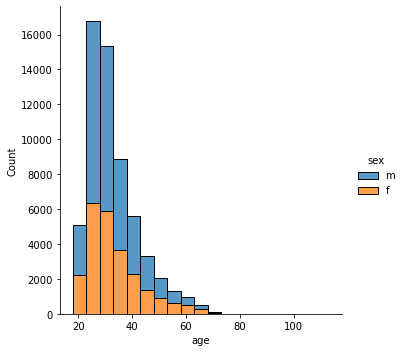

In [9]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack")

We can conclude that most user range from 18 to under 80. Therefore, the datapoint which has "age" >80 are not really valuable.

In [10]:
profiles["age"] = profiles[profiles["age"] <=80]["age"]
profiles.max() #the highest age is 69

C:\Users\Admin\AppData\Local\Temp/ipykernel_23620/3437136247.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  profiles.max() #the highest age is 69


age                            69.0
height                         95.0
income                      1000000
last_online        2012-07-01-08-57
location       woodside, california
orientation                straight
sex                               m
status                      unknown
dtype: object

There are outliers in "height". The min value of "height" is 1 inch which is impossible. The height of the shortest person in the wolrd is about 20 inches. Therefore, we should inspect datapoints which the "height" value is under 20 to see if these data points are valueable.


In [11]:
profiles[profiles["height"] <= 20]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
12193,30.0,NaN,mostly vegetarian,socially,NaN,graduated from space camp,"well, hello and thank you for stopping by my g...","i mostly try to be good at what i do, maintain...",folding laundry.,perhaps my eyes? i'm told they are a unique co...,i really like memoirs of folks who have persev...,NaN,how many more minutes until i can get into my ...,relaxing!,"when i was a kid, i poured myself a glass of r...",you are easy going and big loving.<br />\nyou ...,white,8.0,-1,medicine / health,2012-06-30-03-02,"berkeley, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,judaism but not too serious about it,f,taurus but it doesn&rsquo;t matter,no,english,single
18832,39.0,athletic,NaN,socially,never,graduated from masters program,home: i was a happy surprise for my parents. y...,working at a start-up in technology. never rea...,online dating. it's the dating in real life th...,that i am trying to notice what they are tryin...,"books: espn, 30 rock, kama sutra, spider-man<b...","1)global warming; uhmm, i mean climate change ...",what i am going to write in this online profile.,trying to figure out something atypical to do ...,-i have mommy issues.<br />\n-i can time trave...,"you are super insecure, emotionally vacant, an...",asian,3.0,-1,computer / hardware / software,2012-06-24-14-33,"san francisco, california",NaN,straight,likes dogs,christianity but not too serious about it,m,gemini but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay), french (po...",single
23767,32.0,thin,mostly anything,desperately,NaN,working on ph.d program,small teller of tall tales. nostalgiaphile. un...,entropologist/enigmatologist/muse/things that ...,the things i don't quit. but only because i te...,something about the eyes-to-face ratio. and th...,current train reading = miranda july's _no one...,they wouldn't be things. they would be people.,"most everything. sometimes (okay, maybe often)...",awake. but that's every night. i suppose that ...,i have no idea why i selected this username. (...,*you're so inclined.<br />\n<br />\n*oh! but i...,NaN,6.0,-1,entertainment / media,2011-06-29-22-32,"san francisco, california",NaN,straight,likes dogs and has cats,agnosticism,f,NaN,no,"english (fluently), french (okay), german (poo...",single
37111,25.0,fit,mostly anything,socially,never,graduated from college/university,dating me is not for everyone. i will frequent...,"in preschool, i was the boy that drew transfor...",besides the obvious stated above:<br />\ncrack...,"the hair. and yes, they're deadly poisonous sp...","<a class=""ilink"" href=""/interests?i=octobor+sk...","1. my iphone, but that's as far as i'll go wit...","art, plans for the future and what's for dinner.",out having a great time with my buddies at a s...,i've seen all 3 twilight movies.<br />\ndespit...,you're not a date rapist<br />\nyou have the c...,asian,9.0,1000000,artistic / musical / writer,2011-11-15-19-55,"san mateo, california",NaN,straight,NaN,NaN,m,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), chinese (fluently), japane...",single
45959,36.0,NaN,NaN,very often,never,graduated from college/university,i'm a transplant from southern california with...,"living each day as if it'd be my last, and man...","writing, rambling, fixing anything thats break...","my otherwise perfect hair, my half-sleeve tatt...","i enjoy reading louis sachar, james burke, ala...",irish whiskey<br />\nbroadband internet<br />\...,"zombies, and ways not to get eaten by them.<br...",peering through the bottom of a whiskey glass....,"i can't stand online dating, or the stigma att...",if you're a ninja (with skills) or a pirate. y...,NaN,1.0,80000,science / tech / engineering,2012-06-28-14-18,"oakland, california",NaN,straight,likes 

These datapoint seems valuable in some attributes. We can assume that these users has typo in their height. 
We convert every "height" value <= 20 to NaN

In [12]:
for height in profiles[profiles["height"]<= 20]["height"]:
    profiles["height"]= profiles["height"].replace(height, np.nan)

# profiles["height"].isna().sum()

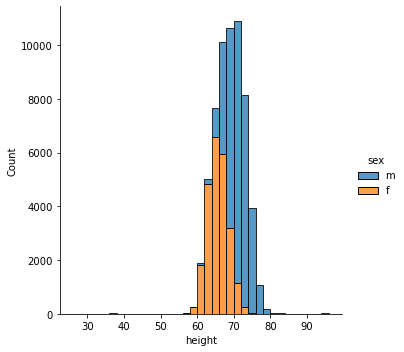

In [13]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

The above plot shows the height variable, most people look like they are between 60 inches tall and 80 inches tall. Females tend to be shorter than males and looks to have a normal distribution.

We also can see that most of people do not show their income on the app. The missing data here is indicated with value "-1". In my opinion, -1 should be convereted to np.nan

In [14]:
profiles["income"]= profiles["income"].replace(-1, np.nan)
profiles["income"].isna().sum()

48442

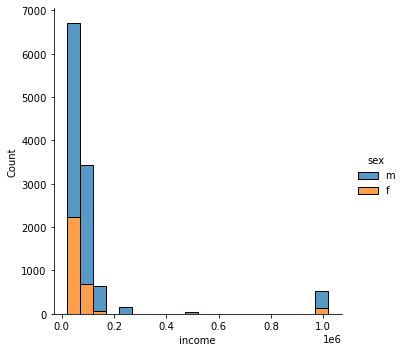

In [15]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

There are some outliers. We can limit the income to under 400000 to see the income distribution

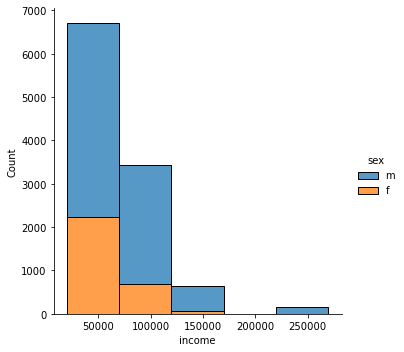

In [16]:
sns.displot(data=profiles[profiles["income"]<=400000], x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

Now we will check the all discrete variable to see their unique value

In [17]:
for col in profiles.columns:
    
    if not re.match(r"essay\d", col) and profiles[col].dtype== np.dtype('O'):
        print()
        print("Column name: ",col)
        print(profiles[col].value_counts(dropna=False))
        print('\n\n\n')


Column name:  body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64





Column name:  diet
NaN                    24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64





Column name:  drinks
sociall

In [18]:
for loc in profiles.location:
    if "," not in loc:
        print(loc)

In [19]:
profiles.location.isna().sum()

0

The city name and state name is seperated by a comma in each "location".

In the column "offspring", we can see that every apostrophe is represented by "%rsquo;".


In [20]:
profiles["offspring"]=profiles["offspring"].apply(lambda x: x.replace("&rsquo;","\'") if type(x)== str else x)
profiles["offspring"].value_counts()

doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

### Clean labels

We see that sign should only have 12 categories.

In [21]:
profiles['signsCleaned']= profiles.sign.str.split().str.get(0)

print("nnumber of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

We also see that "religion" can be cleaned by taking the first word and distilling down to 9 groups.

In [22]:
profiles["religionCleaned"]=profiles.religion.str.split().str.get(0)
profiles["religionCleaned"].value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religionCleaned, dtype: int64

### Data visualization

#### Continuous variables

The plots for these variables are shown above.

#### Discrete Variables

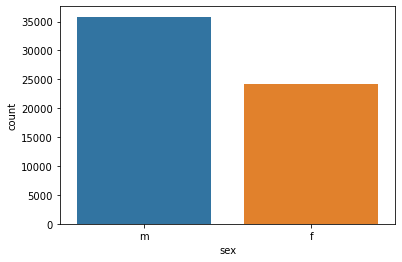

In [23]:
sns.countplot(data=profiles, x="sex");

There are more men than women

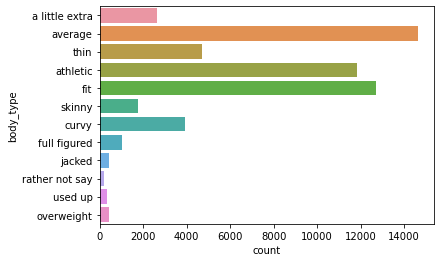

In [24]:
sns.countplot(data=profiles, y="body_type");

Most people describe themselves as average, fit, or athletic.

<AxesSubplot:xlabel='count', ylabel='body_type'>

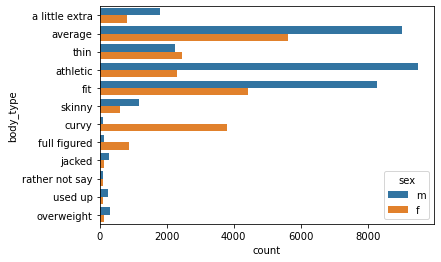

In [25]:
sns.countplot(data=profiles, y="body_type", hue="sex")

.some of body type descriptions are highly gendered: "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

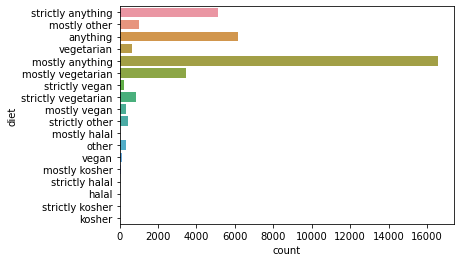

In [26]:
sns.countplot(data=profiles, y="diet");

The majority of users report eating "mostly anything", "anything" and "strictly anything," and it appears that being open-minded is a common way to attract possible mates.

<AxesSubplot:xlabel='count', ylabel='drinks'>

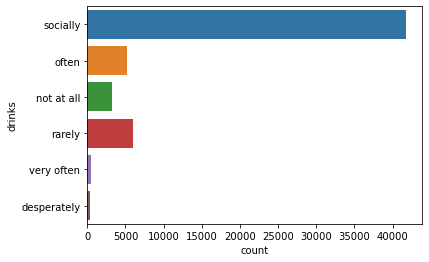

In [27]:
sns.countplot(data=profiles, y="drinks")

Mót users only drinks "socially".

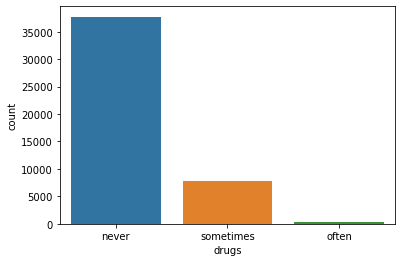

In [28]:
sns.countplot(data=profiles, x="drugs");

Majority of people "never" use drugs.

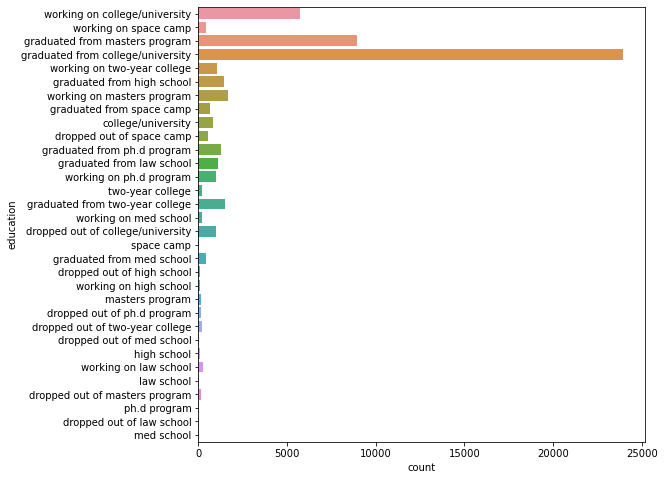

In [29]:
plt.figure(figsize=(8,8))

sns.countplot(data=profiles, y="education");

Above you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university.

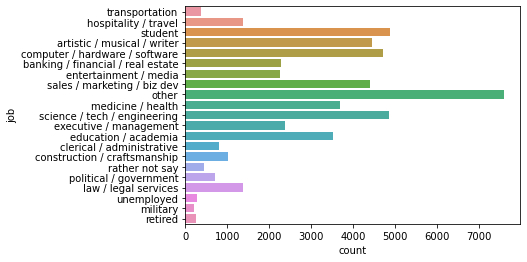

In [30]:
sns.countplot(data=profiles, y="job");

Most people do not find their jobs in the category provided. However, the most common job are tudents, artists, tech, and business folks.

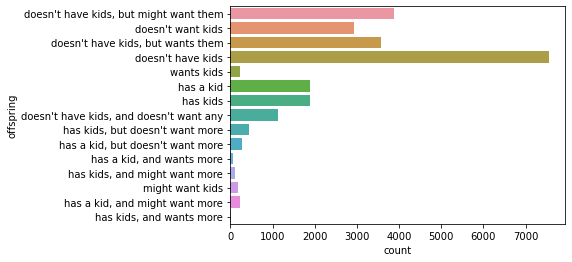

In [31]:
sns.countplot(data=profiles, y="offspring");

Users usually do not have kid

<AxesSubplot:xlabel='orientation', ylabel='count'>

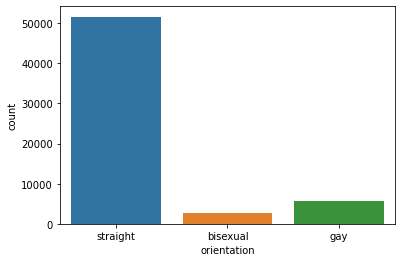

In [32]:
sns.countplot(data=profiles, x="orientation")

Although most of people are straight, the lgbt group has a considerable number. We can investigate the distribution of gender in each category of "orientation"

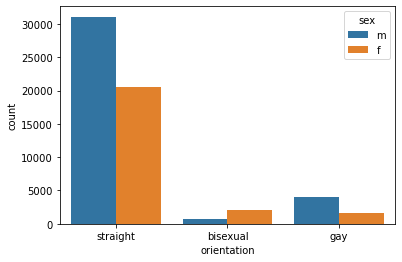

In [33]:
sns.countplot(data=profiles, x="orientation", hue = "sex");

A interesting conclusion from the chart is the majority of bisexual users are female

<AxesSubplot:xlabel='count', ylabel='pets'>

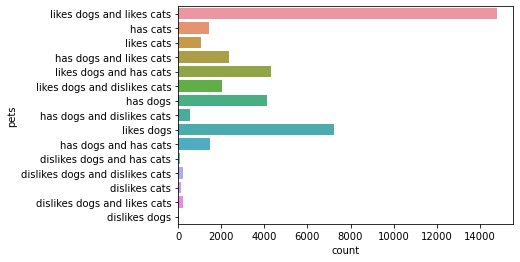

In [34]:
sns.countplot(data=profiles, y="pets")
# Dogs seems to be more favourite pet than cats.

<AxesSubplot:xlabel='count', ylabel='religionCleaned'>

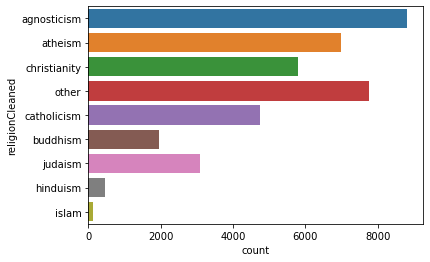

In [35]:
sns.countplot(data=profiles, y="religionCleaned")

We can see that the majority was not very religious

<AxesSubplot:xlabel='count', ylabel='signsCleaned'>

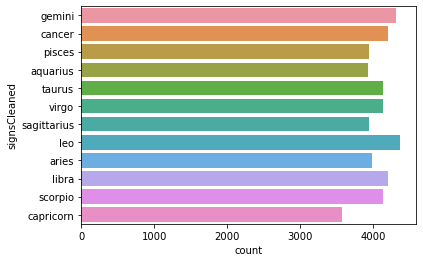

In [36]:
sns.countplot(data=profiles, y="signsCleaned")

THere are even distribution between signs.

<AxesSubplot:xlabel='smokes', ylabel='count'>

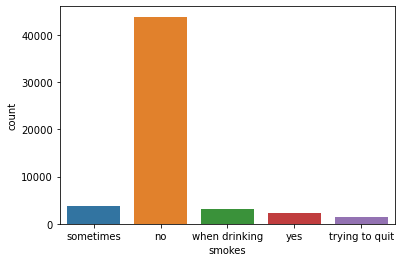

In [37]:
sns.countplot(data=profiles, x="smokes")

Most of users do not smoke

<AxesSubplot:xlabel='status', ylabel='count'>

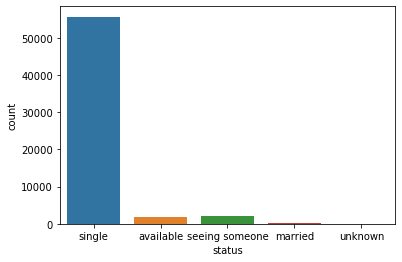

In [38]:
sns.countplot(data=profiles, x="status")

The majority is single. This is predictable since people usually use a dating app to find a relationship


## Predict sign of a user
People said your zodiac sign will show some traits of a person. Does the opposite happen when we use a person's characteristics to predict his/her sign?

### Preprocessing

First we need to select the varaibles that seem to be a good predictor for "sign". For example, "age" or "location" seems not to be related to "sign"

In [39]:
predictor_cols=['body_type', 'diet', 'orientation', 'pets', 'religionCleaned','sex', 'job', 'signsCleaned']
df = profiles[predictor_cols].dropna() #remove nan value

In [40]:
df.shape

(16453, 8)

Next step, we will use the pandas .get_dummies() method which creates a binary or “dummy” variable for each category. The reason is that some models requires numeric variable value such as decision tree

In [41]:
for col in predictor_cols[:-1]: #exclude the label variable
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [42]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,orientation_bisexual,orientation_gay,orientation_straight,pets_dislikes cats,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religionCleaned_agnosticism,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,sex_f,sex_m,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Above we shown that there are even distribution between categories in "signsCleaned". Therefore, class im balance is not the problem.

Next we split the dataframe into training set (75%) and validation set (25%)

In [43]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

In [44]:
#Currently Y_train and Y_val is a Dataframe, we need to flatten them
Y_train = Y_train.to_numpy().flatten()
Y_val = Y_val.to_numpy().flatten()

### Prediction

#### Selecting model

I decide to selects three models: Logistic Regression, Decision Trees, and KNN to predict the sign of a person.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Evaluation Metrics

There are several ways to evaluate the models including:
- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict.

Because all class has the same weight, accuracy should be the main metric to evaluate the model

In [46]:
from sklearn.metrics import classification_report

### LogisticRegression

In [47]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

d:\anaconda\anaconda_2021.11-Install\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



12% accuracy is too low for this model even we conduct the evaluation on the training set.

We evaluate on test set

In [49]:
print(classification_report(Y_val, lr_model.predict(X_val)))

              precision    recall  f1-score   support

    aquarius       0.07      0.04      0.05       294
       aries       0.07      0.06      0.06       345
      cancer       0.09      0.21      0.13       328
   capricorn       0.14      0.04      0.07       315
      gemini       0.08      0.10      0.09       366
         leo       0.09      0.14      0.11       395
       libra       0.07      0.05      0.06       326
      pisces       0.11      0.09      0.10       337
 sagittarius       0.08      0.05      0.06       347
     scorpio       0.07      0.02      0.03       355
      taurus       0.08      0.08      0.08       345
       virgo       0.09      0.14      0.11       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



The accuracy is only 0.09 on test set which is terrible considering a random guess should result in being correct ~8% of the time (1/12).



### KNN

We select k=5 for the model. We can adjust the k value when needed

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [51]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



The model has 0.33 accuracy which performs better than random guessing. However, it is not a good sign because we currently use training set as test set. 

In [52]:
print(classification_report(Y_val, knn_model.predict(X_val)))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



knn with k=5 does not perform better than lr_model on test set. 

We can try different k value to see if we can improve the model

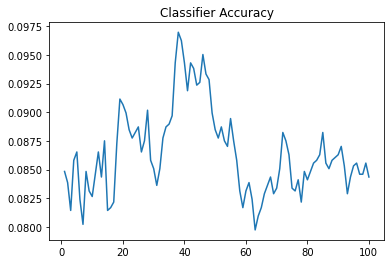

In [53]:
accuracies=list()
for k in range(1,101):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)
    accuracies.append(classifier.score(X_val, Y_val))

k_list= range(1,101)
plt.plot(k_list,accuracies)
plt.title("Classifier Accuracy")
plt.show()

The best accuracy the model can achieve on test set is up to 0.0975.

### Decision Trees


In [54]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
print(classification_report(Y_train,cart_model.predict(X_train)))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



the accuracy is promising. However, overfitting may happen since we evaluate model on training set

In [55]:
print(classification_report(Y_val,cart_model.predict(X_val)))

              precision    recall  f1-score   support

    aquarius       0.08      0.12      0.09       294
       aries       0.08      0.09      0.09       345
      cancer       0.09      0.14      0.11       328
   capricorn       0.07      0.07      0.07       315
      gemini       0.08      0.08      0.08       366
         leo       0.10      0.10      0.10       395
       libra       0.09      0.10      0.09       326
      pisces       0.10      0.09      0.09       337
 sagittarius       0.13      0.09      0.10       347
     scorpio       0.10      0.08      0.09       355
      taurus       0.07      0.05      0.06       345
       virgo       0.08      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.09      4114
weighted avg       0.09      0.09      0.09      4114



We can see decision tree does not perform bettern than other model in test set.

In [56]:
cart_model.get_depth()

49

It shows that this tree model as a depth of 49, therefore it overfits the training set. 

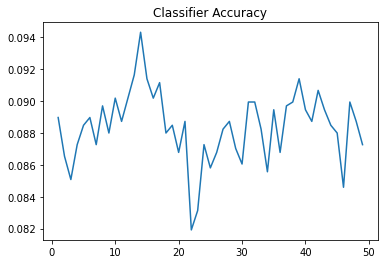

In [57]:
accuracies=list()
for k in range(1,50):
    classifier=DecisionTreeClassifier(max_depth=k)
    classifier.fit(X_train, Y_train)
    accuracies.append(classifier.score(X_val, Y_val))

k_list= range(1,50)
plt.plot(k_list,accuracies)
plt.title("Classifier Accuracy")
plt.show()

In [58]:
max_value = max(accuracies)
index = accuracies.index(max_value)
print(index)
print(max_value)

13
0.09431210500729217


THe highest accuracy is 0.095 when max_depth=13.

### Random Forest

In [59]:
rf_classifier = RandomForestClassifier(n_estimators = 50)
rf_classifier.fit(X_train,Y_train)
print(classification_report(Y_train,rf_classifier.predict(X_train)))

              precision    recall  f1-score   support

    aquarius       0.81      0.78      0.80       968
       aries       0.76      0.78      0.77       983
      cancer       0.79      0.78      0.78      1129
   capricorn       0.81      0.78      0.79       882
      gemini       0.79      0.77      0.78      1130
         leo       0.78      0.80      0.79      1121
       libra       0.77      0.78      0.77      1028
      pisces       0.73      0.79      0.76       997
 sagittarius       0.80      0.77      0.78       965
     scorpio       0.78      0.79      0.79      1001
      taurus       0.78      0.79      0.78      1045
       virgo       0.78      0.78      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.78      0.78      0.78     12339
weighted avg       0.78      0.78      0.78     12339



rf_classifier can achieve 0.78 accuracy on training set which is promising

In [60]:
print(classification_report(Y_val,rf_classifier.predict(X_val)))

              precision    recall  f1-score   support

    aquarius       0.08      0.09      0.08       294
       aries       0.10      0.09      0.09       345
      cancer       0.07      0.10      0.08       328
   capricorn       0.05      0.05      0.05       315
      gemini       0.06      0.06      0.06       366
         leo       0.10      0.09      0.09       395
       libra       0.10      0.10      0.10       326
      pisces       0.08      0.09      0.08       337
 sagittarius       0.10      0.08      0.09       347
     scorpio       0.11      0.09      0.10       355
      taurus       0.09      0.09      0.09       345
       virgo       0.10      0.09      0.10       361

    accuracy                           0.09      4114
   macro avg       0.09      0.08      0.08      4114
weighted avg       0.09      0.09      0.09      4114



Random Forest performs no better than previous models on test set :(

### Final model

All model we have tried above has similar performance on the test set. Howeover, based on the test of the training set, the final model should be `rf_classifier` model.

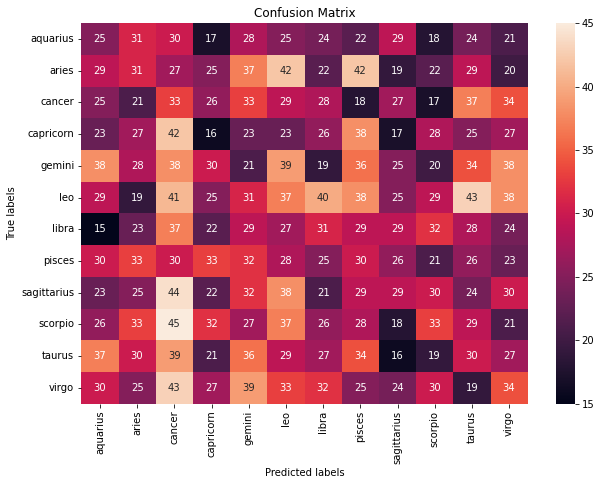

In [61]:
from sklearn.metrics import confusion_matrix 

final_cm = confusion_matrix(Y_val, rf_classifier.predict(X_val))
rf_labels = rf_classifier.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(rf_labels); 
ax.yaxis.set_ticklabels(rf_labels);

In the confusion matrix, it becomes clear that Cancer, Leo, Pisces and virgo was predicted most often, but the model still does not perform well because diagonal of matrix has the dark color mostly.

Seems these features are not good to predict the sign

Idea: How about using essays to predict the sign. My ideas are combined all the essay to create a MB model. use Beautyful Soup I think to clean the 

In [62]:
print(profiles.essay1[0])
print(profiles.essay1[1])
print(profiles.essay1[2])


currently working as an international agent for a freight
forwarding company. import, export, domestic you know the
works.<br />
online classes and trying to better myself in my free time. perhaps
a hours worth of a good book or a video game on a lazy sunday.
dedicating everyday to being an unbelievable badass.
i make nerdy software for musicians, artists, and experimenters to
indulge in their own weirdness, but i like to spend time away from
the computer when working on my artwork (which is typically more
concerned with group dynamics and communication, than with visual
form, objects, or technology). i also record and deejay dance,
noise, pop, and experimental music (most of which electronic or at
least studio based). besides these relatively ego driven
activities, i've been enjoying things like meditation and tai chi
to try and gently flirt with ego death.


I realized that there are some html mark in the answers. The Data is not clean. I can use BeautifulSoup or lxml.html

In [63]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(profiles.essay1[0],"html.parser")
type(soup)

bs4.BeautifulSoup

In [64]:
soup.get_text().strip()

'currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.'

In [65]:
str = soup.get_text()
print(str)

currently working as an international agent for a freight
forwarding company. import, export, domestic you know the
works.
online classes and trying to better myself in my free time. perhaps
a hours worth of a good book or a video game on a lazy sunday.


Now we create a copy of the original DataFrame and select all the essay column and the signsCleaned

In [66]:
nb_profiles=profiles.copy()
nb_profiles= nb_profiles[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9","signsCleaned"]]

In [67]:
nb_profiles.signsCleaned.value_counts(dropna=False)

NaN            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: signsCleaned, dtype: int64

In [68]:
nb_profiles.fillna(" ", inplace=True)
nb_profiles.signsCleaned.replace(" ", np.nan, inplace=True)
nb_profiles.signsCleaned.value_counts(dropna=False)

NaN            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: signsCleaned, dtype: int64

In [69]:
len(nb_profiles)-nb_profiles.signsCleaned.isna().sum()

48890

In [70]:
nb_profiles.dropna(inplace=True)
len(nb_profiles)

48890

In [71]:
nb_profiles["all_essays"] = nb_profiles["essay0"] + nb_profiles["essay1"] + nb_profiles["essay2"] + nb_profiles["essay3"] + nb_profiles["essay4"] + nb_profiles["essay5"] + nb_profiles["essay6"] + nb_profiles["essay7"] + nb_profiles["essay8"] + nb_profiles["essay9"]

In [72]:
from bs4 import BeautifulSoup
nb_profiles["all_essays"]=nb_profiles["all_essays"].apply(lambda x: BeautifulSoup(x,"html.parser").get_text().strip())

d:\anaconda\anaconda_2021.11-Install\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: " .        " looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(
d:\anaconda\anaconda_2021.11-Install\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: ".         " looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(
d:\anaconda\anaconda_2021.11-Install\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: "......         " looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(
d:\anaconda\anaconda_2021.11-Install\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: "...         " looks like a directory name, not markup. You may

In [77]:
nb_profiles["all_essays"][0]

"about me:\n\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.\n\nabout you:\n\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you should be able to bend spoons\nwith

In [86]:
#Y is the target column, X has the rest
X= nb_profiles["all_essays"]
Y= nb_profiles["signsCleaned"]
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.2) 

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer= CountVectorizer()
train_counts=vectorizer.fit_transform(train_data)
classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)

test_vectors= vectorizer.transform(test_data)


In [96]:
print(classification_report(test_labels, classifier.predict(test_vectors)))


              precision    recall  f1-score   support

    aquarius       0.09      0.01      0.02       825
       aries       0.08      0.02      0.03       808
      cancer       0.08      0.09      0.09       849
   capricorn       0.17      0.01      0.01       762
      gemini       0.09      0.32      0.15       795
         leo       0.09      0.18      0.12       870
       libra       0.08      0.12      0.10       823
      pisces       0.07      0.03      0.04       755
 sagittarius       0.10      0.02      0.04       822
     scorpio       0.10      0.03      0.04       862
      taurus       0.08      0.11      0.09       793
       virgo       0.09      0.12      0.10       814

    accuracy                           0.09      9778
   macro avg       0.09      0.09      0.07      9778
weighted avg       0.09      0.09      0.07      9778



We can see that the model is not very accurate. This is because the dataset is very small and the model is not very complex. We can try to improve the model by using a more complex model, or by using a larger dataset.
Moreover, we can see that the star sign is hard to predict by how users write their answer or some attributes such as body type, orientation, or pets

It turns out that neither lifestyle aspects nor essay language are reliable indicators of a user's star sign. 